<a href="https://colab.research.google.com/github/usmanmalik07/Adept-Internship/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
from keras.callbacks import EarlyStopping

In [2]:
#loading data
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/train.csv')

In [3]:
# X is the pixels and Y is the image labels
X = train.iloc[:,1:]
Y = train.iloc[:,0]
#splitting dataframe using train_test_split
x_train , x_test , y_train , y_test = train_test_split(X, Y , test_size=0.1, random_state=42)

In [4]:
#first param in reshape is number of examples. We can pass -1 here as we want numpy to figure that out by itself

#reshape(examples, height, width, channels)
x_train = x_train.values.reshape(-1, 28, 28, 1)
x_test = x_test.values.reshape(-1, 28, 28, 1)

In [5]:
datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
            zoom_range = 0.1, # Randomly zoom image
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=False,  # randomly flip images
            vertical_flip=False)  # randomly flip images

In [6]:
#convert values to float as result will be a float. If not done vals are set to zero

x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255


#fitting the ImageDataGenerator
datagen.fit(x_train)

In [7]:
#notice num_classes is set to 10 as we have 10 different labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [8]:
#Conv2d data_format parameter we use 'channel_last' for imgs

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last',
                 input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid' ))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', activation='relu', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid', strides=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [9]:

#Optimizer
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999 )

#Compiling the model
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [10]:
#Define LearningRateScheduler
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [11]:
#defining these prior to model to increase readability and debugging
batch_size = 64
epochs = 50

# Fit the Model
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs,
                              validation_data = (x_test, y_test), verbose=1,
                              steps_per_epoch=x_train.shape[0] // batch_size,
                              callbacks = [reduce_lr]) #left out early_stopping parameter as it gets better accuracy


<ipython-input-11-04bbb6cf3557>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x_train, y_train, batch_size = batch_size), epochs = epochs,


Epoch 1/50
590/590 [==============================] - 195s 323ms/step - loss: 0.3697 - accuracy: 0.8904 - val_loss: 0.0981 - val_accuracy: 0.9717 - lr: 0.0010
Epoch 2/50
590/590 [==============================] - 195s 330ms/step - loss: 0.1342 - accuracy: 0.9604 - val_loss: 0.0430 - val_accuracy: 0.9867 - lr: 9.0000e-04
Epoch 3/50
590/590 [==============================] - 197s 334ms/step - loss: 0.0961 - accuracy: 0.9707 - val_loss: 0.0435 - val_accuracy: 0.9867 - lr: 8.1000e-04
Epoch 4/50
590/590 [==============================] - 189s 320ms/step - loss: 0.0803 - accuracy: 0.9753 - val_loss: 0.0555 - val_accuracy: 0.9838 - lr: 7.2900e-04
Epoch 5/50
590/590 [==============================] - 183s 311ms/step - loss: 0.0709 - accuracy: 0.9780 - val_loss: 0.0348 - val_accuracy: 0.9888 - lr: 6.5610e-04
Epoch 6/50
590/590 [==============================] - 184s 311ms/step - loss: 0.0565 - accuracy: 0.9832 - val_loss: 0.0422 - val_accuracy: 0.9871 - lr: 5.9049e-04
Epoch 7/50
590/590 [======

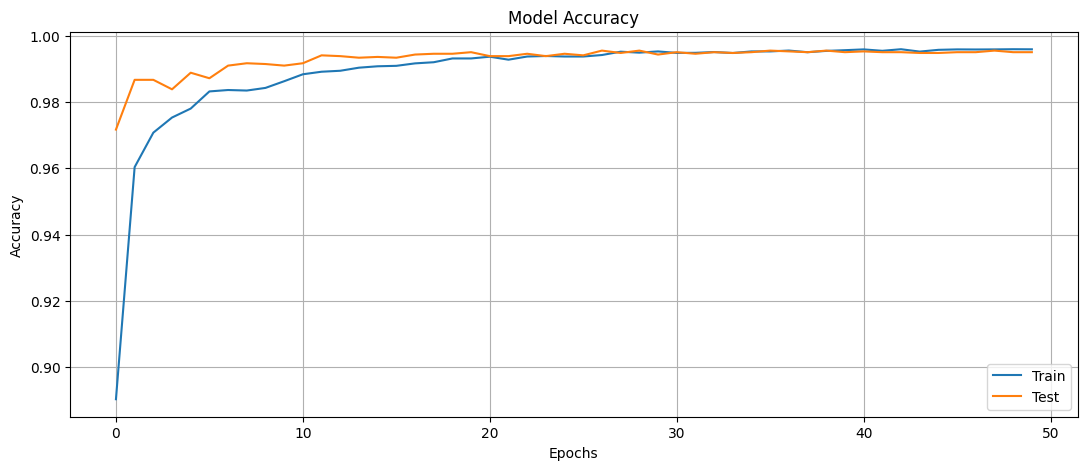

In [12]:
plt.figure(figsize=(13, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'])
plt.grid()
plt.show()

In [13]:
pred_digits_test = np.argmax(model.predict(x_test),axis=1)
image_id_test = []

for i in range (len(pred_digits_test)):
    image_id_test.append(i+1)

d = {'ImageId':image_id_test,'Label':pred_digits_test}
answer = pd.DataFrame(d)

answer.to_csv('answer.csv',index=False)

132/132 [==============================] - 5s 33ms/step
